# AutoAugment on Wide ResNet 28 10 with CIFAR-10 policy

# 1. Environment Setup
## 1.0. Check GPU

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## 1.1. Import

In [2]:
import augmentation, policy, train
import torch, torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Ignore Warning
import warnings
warnings.filterwarnings(action='ignore')

# 2. Data Preprocessing

In [3]:
batch_size = 128
cifar_dir = '../../../../data/OCR/Jason/cifar10/'

policy_type = 'cifar_code'

In [4]:
pre_train_transform = [transforms.RandomCrop(32, padding=4), transforms.RandomHorizontalFlip()]
post_train_transform = [augmentation.Cutout(1, 8), transforms.ToTensor(), 
                        transforms.Normalize(mean=[0.4921, 0.4828, 0.4474], std=[0.1950, 0.1922, 0.1940])]

train_transform = policy.Policy(policy_type, pre_train_transform, post_train_transform)

test_transform = transforms.Compose([transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.4921, 0.4828, 0.4474], std=[0.1950, 0.1922, 0.1940])])

train_dataset = torchvision.datasets.CIFAR10(cifar_dir, train=True, download=False, transform=train_transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=False)

test_dataset = torchvision.datasets.CIFAR10(cifar_dir, train=False, download=False, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=False)

# 3. Train Model

In [5]:
depth = 28
widen_factor = 10
dropout_rate = 0.3
num_classes = 10

gpu_id = 5
print_freq = 60
epoch_print = 10

save = False
epochs = 201

lr = 0.1
momentum = 0.9
weight_decay = 0.0005
nesterov = True
milestones = [60, 120, 160]

In [6]:
WRN_28_10 = train.Wide_ResNet(depth, widen_factor, dropout_rate, num_classes, gpu_id, print_freq, epoch_print)

In [7]:
WRN_28_10.train(train_loader, test_loader, save, epochs, lr, momentum, weight_decay, nesterov, milestones)

Epoch 1 Started...

*********************************** Best Acc Updated ***********************************
Iteration : 60 - Train Loss : 1.9937, Test Loss : 2.1469, Train Acc : 21.8750, Test Acc : 23.7500

*********************************** Best Acc Updated ***********************************
Iteration : 120 - Train Loss : 1.7885, Test Loss : 2.1272, Train Acc : 30.4688, Test Acc : 29.4500

*********************************** Best Acc Updated ***********************************
Iteration : 180 - Train Loss : 1.7617, Test Loss : 1.9605, Train Acc : 34.3750, Test Acc : 29.9900

*********************************** Best Acc Updated ***********************************
Iteration : 240 - Train Loss : 1.6466, Test Loss : 1.5338, Train Acc : 40.6250, Test Acc : 44.4200
Iteration : 300 - Train Loss : 1.7165, Test Loss : 1.8057, Train Acc : 35.1562, Test Acc : 38.8800
Iteration : 360 - Train Loss : 1.5419, Test Loss : 1.8924, Train Acc : 42.1875, Test Acc : 39.9300
Epoch 11 Started...

*******

Iteration : 180 - Train Loss : 0.2552, Test Loss : 0.2128, Train Acc : 93.7500, Test Acc : 92.9500
Iteration : 240 - Train Loss : 0.4676, Test Loss : 0.1985, Train Acc : 82.8125, Test Acc : 93.4500
Iteration : 300 - Train Loss : 0.2051, Test Loss : 0.1891, Train Acc : 92.1875, Test Acc : 93.3800
Iteration : 360 - Train Loss : 0.2895, Test Loss : 0.1947, Train Acc : 91.4062, Test Acc : 93.4300
Epoch 111 Started...
Iteration : 60 - Train Loss : 0.2657, Test Loss : 0.1912, Train Acc : 92.1875, Test Acc : 93.8900
Iteration : 120 - Train Loss : 0.3424, Test Loss : 0.1890, Train Acc : 89.0625, Test Acc : 93.7100
Iteration : 180 - Train Loss : 0.3993, Test Loss : 0.1968, Train Acc : 83.5938, Test Acc : 93.3600
Iteration : 240 - Train Loss : 0.2103, Test Loss : 0.2170, Train Acc : 94.5312, Test Acc : 93.1400
Iteration : 300 - Train Loss : 0.3847, Test Loss : 0.1911, Train Acc : 87.5000, Test Acc : 93.6000
Iteration : 360 - Train Loss : 0.3444, Test Loss : 0.1842, Train Acc : 87.5000, Test Acc 

Text(0, 0.5, 'Accuracy')

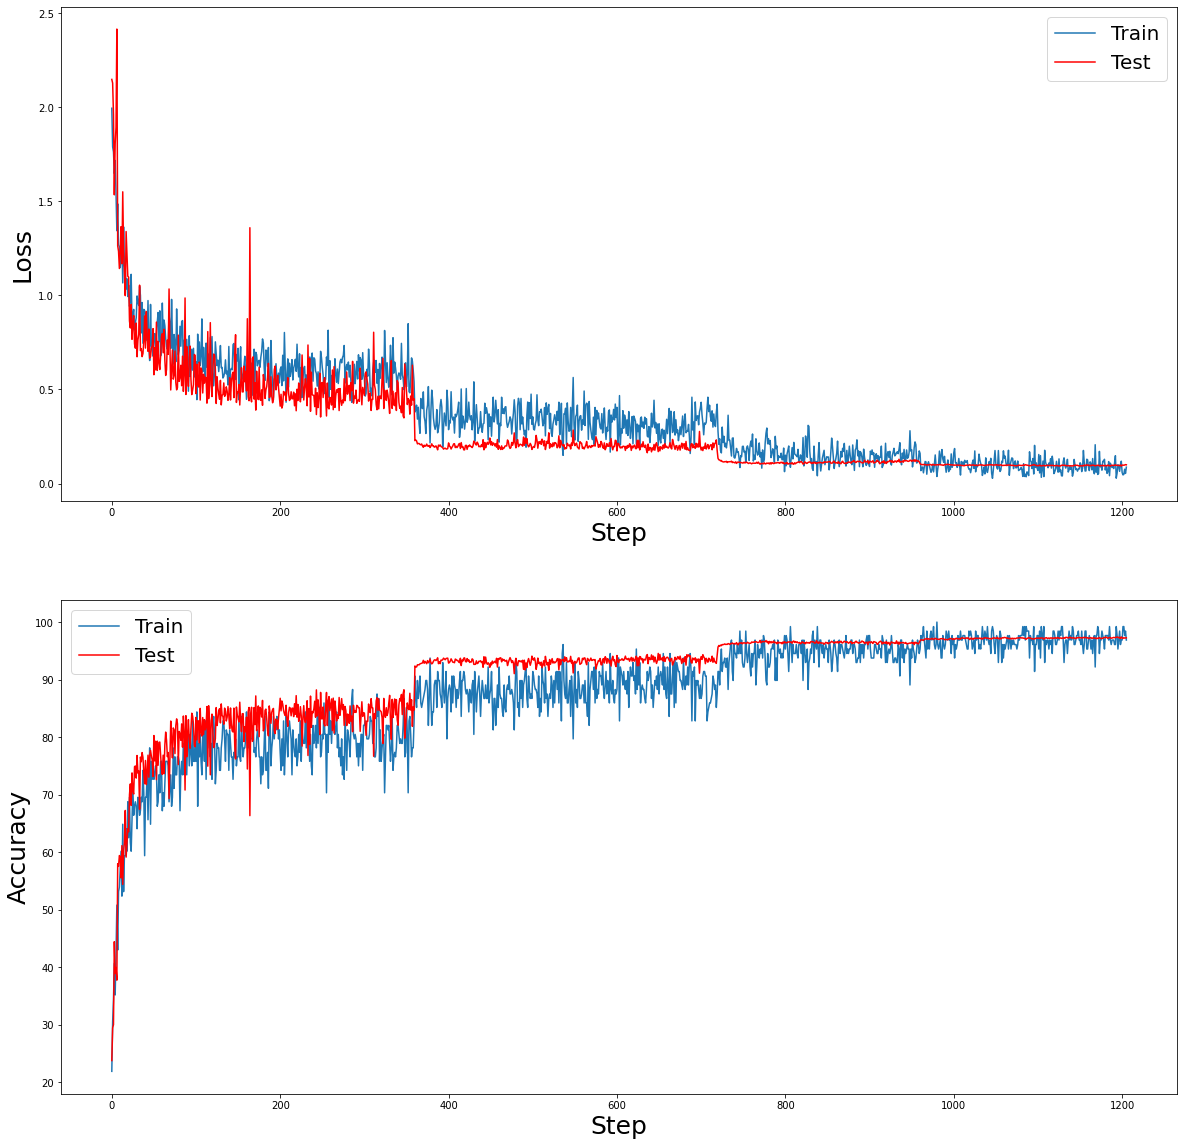

In [8]:
plt.figure(figsize=(20, 20))
plt.rcParams['axes.titlesize'] = 30
plt.axis('off')

label_fontsize = 25

plt.subplot(2, 1, 1)
train_lossline, = plt.plot(WRN_28_10.train_losses, label='Train')
test_lossline, = plt.plot(WRN_28_10.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)

plt.subplot(2, 1, 2)
train_accline, = plt.plot(WRN_28_10.train_acc, label='Train')
test_accline, = plt.plot(WRN_28_10.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Accuracy', fontsize=label_fontsize)